In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load your dataset
file_path = "/"E:\THESIS\data_monthly_rainfall.csv""
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Drop any rows with missing values (if necessary)
data = data.dropna()

# Select the features and target variable
X = data[['Month', 'StationIndex']]  # Features
y = data['Rainfall']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


FileNotFoundError: [Errno 2] No such file or directory: '/content/data_monthly_rainfall.csv'

In [ ]:
# Initialize and train the KNN model
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (KNN): {mse}")

# Predict rainfall for a new data point
new_data = pd.DataFrame({'Month': [3], 'StationIndex': [10]})
new_scaled_data = scaler.transform(new_data)
predicted_rainfall = model.predict(new_scaled_data)
print(f"Predicted Rainfall (KNN): {predicted_rainfall[0]}")


Mean Squared Error (KNN): 22214.817606684574
Predicted Rainfall (KNN): 12.2


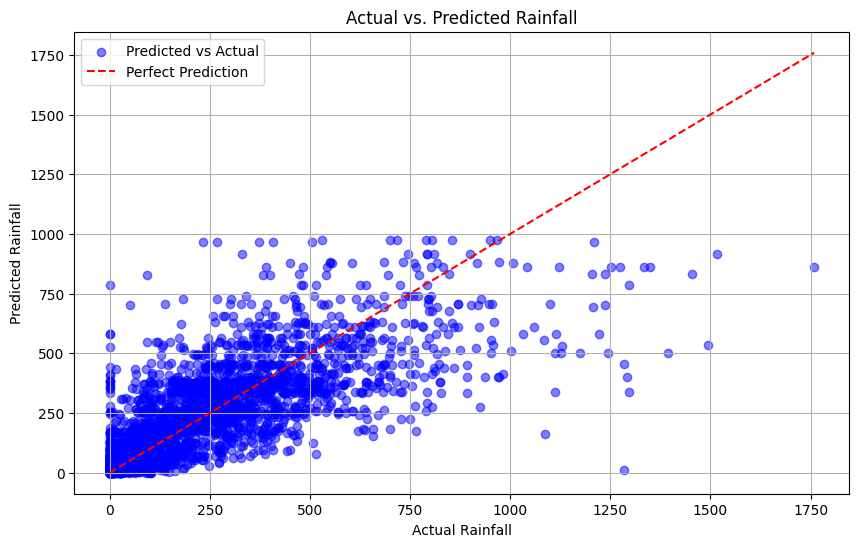

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.title('Actual vs. Predicted Rainfall')
plt.legend()
plt.grid(True)
plt.show()
